# Исследование объявлений о продаже квартир

Ваша задача — выполнить предобработку данных и изучить их, чтобы найти интересные особенности и зависимости, которые существуют на рынке недвижимости.

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker

In [3]:
data = pd.read_csv('D:/Documents/Practicum/Projects/real_estate_data.csv', sep='\t')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [3]:
pd.set_option('display.max_columns', None)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Постройте общую гистограмму для всех числовых столбцов таблицы.

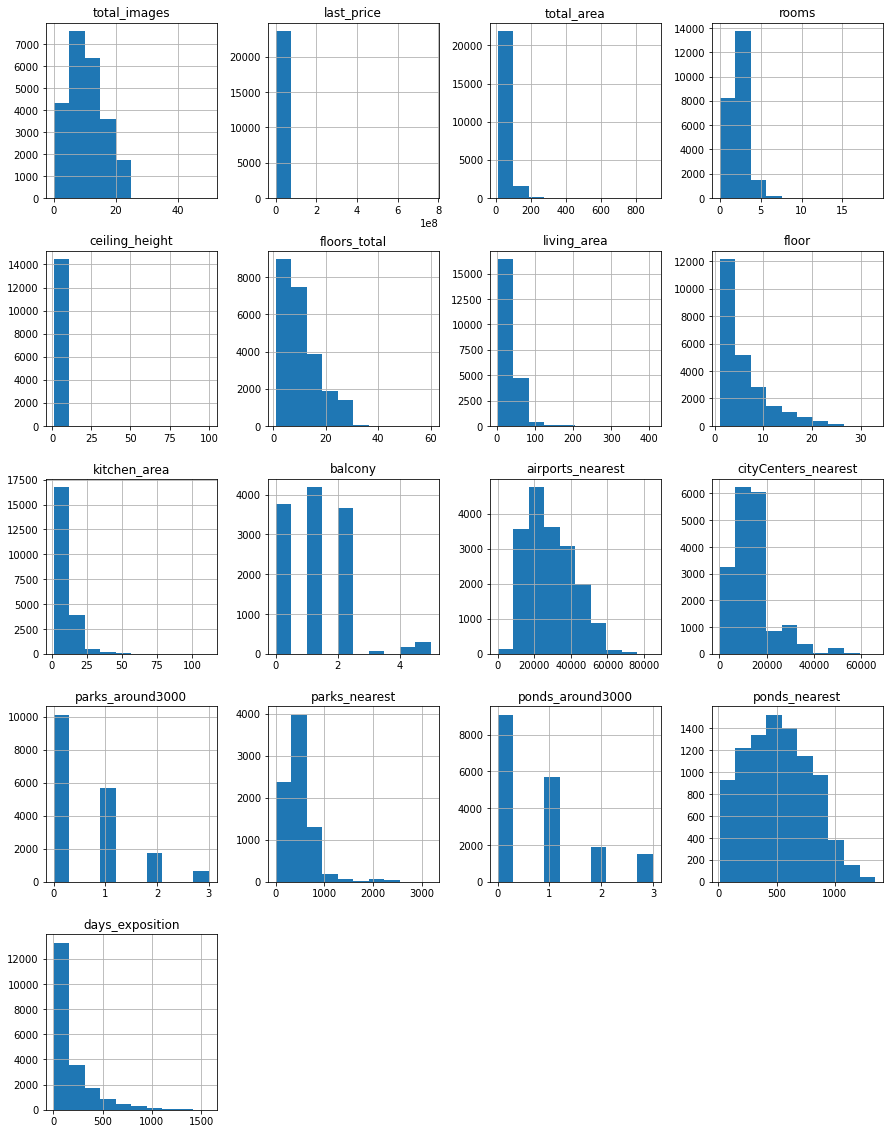

In [4]:
data.hist(bins=10, figsize=(15, 20))
plt.show()

Основные проблемы, которые мжно предварительно обозачить:

1) На графиках цены и общей площади значения сосредоточены около "0". Скорее всего есть выбросы очень больших значенеий.
    
2) Есть странные значения высоты потолка - около 100 метров, здесь явно какая-то ошибка.

3) Срок экспозиции по некоторым объявлениям превышает 3 года. Тут либо объявление не снято с публикации после продажи, либо квартира не продана.
    
4) Количество комнат больше 15 и площадь кухни более 100 кв. метров кажется странным, но допускаем существование таких уникальных объектов (например, коммуналки в центре города после перепланировки). 

### Предобработка данных

Найдите и изучите пропущенные значения в столбцах:

Определите, в каких столбцах есть пропуски.

Заполните пропущенные значения там, где это возможно. Например, если продавец не указал число балконов, то, скорее всего, в его квартире их нет. Такие пропуски правильно заменить на 0. Если логичную замену предложить невозможно, то оставьте эти значения пустыми. Пропуски — тоже важный сигнал, который нужно учитывать.

В ячейке с типом markdown укажите причины, которые могли привести к пропускам в данных.

#### Пропуски, редкие и выбивающиеся значения
Есть пропущенные значения в столбцах:

In [5]:
data.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

##### ceiling_height

9195 пропусков - это много, заменим пропуски медианным значением высоты потолка

In [6]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())

In [7]:
data['ceiling_height'].isnull().sum()  # проверка 

0

In [8]:
data.sort_values(by='ceiling_height', ascending=False).head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
22869,0,15000000.0,25.0,2018-07-25T00:00:00,1,100.0,5.0,14.0,5,True,False,False,11.0,5.0,Санкт-Петербург,34963.0,8283.0,1.0,223.0,3.0,30.0,19.0
3148,14,2900000.0,75.0,2018-11-12T00:00:00,3,32.0,3.0,53.0,2,NaN,False,False,8.0,NaN,Волхов,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22336,19,9999000.0,92.4,2019-04-05T00:00:00,2,32.0,6.0,55.5,5,False,False,False,16.5,4.0,Санкт-Петербург,18838.0,3506.0,0.0,NaN,3.0,511.0,NaN
21377,19,4900000.0,42.0,2017-04-18T00:00:00,1,27.5,24.0,37.7,19,False,False,False,11.0,2.0,Санкт-Петербург,42742.0,9760.0,0.0,NaN,0.0,NaN,61.0
4876,7,3000000.0,25.0,2017-09-27T00:00:00,0,27.0,25.0,17.0,17,NaN,False,True,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,28.0
17857,1,3900000.0,56.0,2017-12-22T00:00:00,3,27.0,5.0,33.0,4,False,False,False,NaN,NaN,Санкт-Петербург,41030.0,15543.0,0.0,NaN,0.0,NaN,73.0
5246,0,2500000.0,54.0,2017-10-13T00:00:00,2,27.0,5.0,30.0,3,NaN,False,False,9.0,2.0,деревня Мины,NaN,NaN,NaN,NaN,NaN,NaN,540.0
20478,11,8000000.0,45.0,2017-07-18T00:00:00,1,27.0,4.0,22.0,2,NaN,False,False,10.0,1.0,Санкт-Петербург,18975.0,3246.0,0.0,NaN,3.0,449.0,429.0
22938,14,4000000.0,98.0,2018-03-15T00:00:00,4,27.0,2.0,73.0,2,True,False,False,9.0,1.0,деревня Нижняя,NaN,NaN,NaN,NaN,NaN,NaN,27.0
5807,17,8150000.0,80.0,2019-01-09T00:00:00,2,27.0,36.0,41.0,13,NaN,False,False,12.0,5.0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,38.0


In [9]:
data.sort_values(by='ceiling_height', ascending=True).head(30)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
22590,16,6000000.0,55.00,2018-10-31T00:00:00,2,1.00,12.0,32.400000,7,NaN,False,False,10.00,NaN,Санкт-Петербург,33053.0,14217.0,2.0,293.0,2.0,289.0,13.0
5712,5,1500000.0,42.80,2017-08-14T00:00:00,2,1.20,2.0,27.500000,1,NaN,False,False,5.20,NaN,городской посёлок Мга,NaN,NaN,NaN,NaN,NaN,NaN,248.0
16934,5,4100000.0,40.00,2017-10-17T00:00:00,1,1.75,37.0,17.400000,5,NaN,False,False,8.34,NaN,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,71.0
20520,9,3600000.0,38.00,2018-07-05T00:00:00,1,2.00,12.0,15.000000,9,NaN,False,False,11.80,1.0,Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,62.0
552,11,2999000.0,33.50,2017-03-30T00:00:00,1,2.00,15.0,17.500000,6,NaN,False,False,6.50,NaN,Санкт-Петербург,33972.0,11746.0,1.0,520.0,1.0,949.0,270.0
4212,1,2120000.0,35.43,2017-12-18T00:00:00,1,2.00,18.0,16.600000,9,NaN,False,False,8.80,2.0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,36.0
5850,9,1650000.0,35.50,2018-05-29T00:00:00,1,2.00,5.0,NaN,5,NaN,False,False,NaN,NaN,Луга,NaN,NaN,NaN,NaN,NaN,NaN,100.0
16884,0,1500000.0,33.00,2018-10-03T00:00:00,1,2.00,5.0,20.000000,5,False,False,False,6.00,NaN,Выборг,NaN,NaN,NaN,NaN,NaN,NaN,6.0
19098,7,2700000.0,56.00,2018-02-04T00:00:00,3,2.00,5.0,46.000000,1,NaN,False,False,6.00,NaN,Выборг,NaN,NaN,NaN,NaN,NaN,NaN,282.0
16446,6,12300000.0,88.30,2019-03-12T00:00:00,3,2.00,5.0,63.900000,2,NaN,False,False,12.00,NaN,Санкт-Петербург,38415.0,7675.0,1.0,568.0,1.0,154.0,NaN


Есть выбивающиеся значения. В значениях больше 20 м возможно неправильно указан разделитель, значения ниже 2 м выглядят неправдоподобно, заменим их на медианное значение

In [10]:
data.loc[(data['ceiling_height'] >= 20), 'ceiling_height'] = (data['ceiling_height'] >= 20) / 10
data.sort_values(by='ceiling_height', ascending=False).head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
15061,19,5600000.0,56.4,2018-05-11T00:00:00,2,14.00,14.0,32.4,5,NaN,False,False,9.1,2.0,Санкт-Петербург,14814.0,13610.0,0.0,NaN,0.0,NaN,315.0
22309,20,5300000.0,45.0,2017-09-30T00:00:00,1,10.30,16.0,15.5,15,NaN,False,False,NaN,NaN,Санкт-Петербург,36353.0,11936.0,2.0,440.0,2.0,450.0,136.0
5863,20,5650000.0,45.0,2018-08-15T00:00:00,1,8.30,16.0,19.3,14,NaN,False,False,8.3,1.0,Санкт-Петербург,13069.0,10763.0,0.0,NaN,1.0,613.0,14.0
17442,0,5350000.0,54.0,2015-06-16T00:00:00,2,8.00,5.0,29.0,2,NaN,False,False,NaN,1.0,Красное Село,24638.0,28062.0,0.0,NaN,0.0,NaN,469.0
15743,14,5600000.0,67.0,2016-11-11T00:00:00,3,8.00,16.0,41.0,1,NaN,False,False,8.0,NaN,Санкт-Петербург,32691.0,11035.0,1.0,723.0,0.0,NaN,474.0
3474,3,1400000.0,30.0,2018-03-16T00:00:00,1,8.00,5.0,15.3,2,False,False,False,7.3,NaN,деревня Нурма,NaN,NaN,NaN,NaN,NaN,NaN,125.0
20264,17,119000000.0,187.6,2017-07-10T00:00:00,4,6.00,7.0,147.0,7,NaN,False,False,15.6,NaN,Санкт-Петербург,26902.0,5605.0,3.0,484.0,1.0,305.0,259.0
21227,0,8200000.0,71.0,2017-07-21T00:00:00,0,5.80,5.0,68.0,5,NaN,True,False,NaN,0.0,Санкт-Петербург,20170.0,1261.0,2.0,295.0,3.0,366.0,30.0
1388,20,59800000.0,399.0,2015-01-21T00:00:00,5,5.60,6.0,NaN,6,NaN,False,False,NaN,0.0,Санкт-Петербург,26204.0,6934.0,2.0,149.0,2.0,577.0,719.0
7578,17,38000000.0,143.0,2017-11-02T00:00:00,3,5.50,5.0,83.0,5,NaN,False,False,29.0,1.0,Санкт-Петербург,26333.0,6448.0,3.0,479.0,0.0,NaN,NaN


In [11]:
data.loc[(data['ceiling_height'] < 2), 'ceiling_height'] = (data['ceiling_height'].median())
data.sort_values(by='ceiling_height', ascending=True).head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
552,11,2999000.0,33.50,2017-03-30T00:00:00,1,2.00,15.0,17.500000,6,NaN,False,False,6.5,NaN,Санкт-Петербург,33972.0,11746.0,1.0,520.0,1.0,949.0,270.0
22960,17,2300000.0,53.60,2018-10-18T00:00:00,2,2.00,2.0,19.000000,1,NaN,False,False,10.0,NaN,Всеволожск,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4212,1,2120000.0,35.43,2017-12-18T00:00:00,1,2.00,18.0,16.600000,9,NaN,False,False,8.8,2.0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,36.0
16446,6,12300000.0,88.30,2019-03-12T00:00:00,3,2.00,5.0,63.900000,2,NaN,False,False,12.0,NaN,Санкт-Петербург,38415.0,7675.0,1.0,568.0,1.0,154.0,NaN
2572,4,2400000.0,62.00,2018-12-27T00:00:00,3,2.00,5.0,40.000000,4,NaN,False,False,6.0,1.0,Луга,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11352,4,3300000.0,36.00,2017-06-18T00:00:00,1,2.00,17.0,15.200000,12,NaN,False,False,10.1,0.0,посёлок Металлострой,25268.0,26980.0,0.0,NaN,0.0,NaN,53.0
5850,9,1650000.0,35.50,2018-05-29T00:00:00,1,2.00,5.0,NaN,5,NaN,False,False,NaN,NaN,Луга,NaN,NaN,NaN,NaN,NaN,NaN,100.0
19329,5,1700000.0,40.00,2018-07-15T00:00:00,2,2.00,9.0,NaN,8,NaN,False,False,NaN,NaN,Сосновый Бор,NaN,NaN,NaN,NaN,NaN,NaN,45.0
19098,7,2700000.0,56.00,2018-02-04T00:00:00,3,2.00,5.0,46.000000,1,NaN,False,False,6.0,NaN,Выборг,NaN,NaN,NaN,NaN,NaN,NaN,282.0
16884,0,1500000.0,33.00,2018-10-03T00:00:00,1,2.00,5.0,20.000000,5,False,False,False,6.0,NaN,Выборг,NaN,NaN,NaN,NaN,NaN,NaN,6.0


<AxesSubplot:>

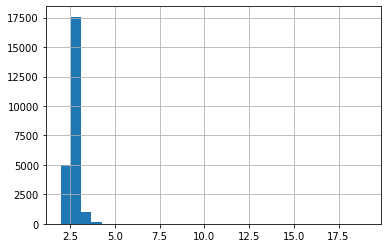

In [12]:
data['ceiling_height'].hist(bins=30, range=(2, 19))

Редкие и выбивающиеся значения устранены.

##### floors_total

86 пропусков - удалим строки, их не много

In [13]:
data.dropna(subset=['floors_total'], inplace=True)  # удалаем пропуски
data.isnull().sum()  # проверка

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area              1870
floor                       0
is_apartment            20838
studio                      0
open_plan                   0
kitchen_area             2231
balcony                 11480
locality_name              48
airports_nearest         5532
cityCenters_nearest      5509
parks_around3000         5508
parks_nearest           15568
ponds_around3000         5508
ponds_nearest           14552
days_exposition          3172
dtype: int64

##### living_area

1870  пропусков заменим средним значением соотношения жилой площади к общей

In [14]:
living_area_mean = round((data['living_area'] / data['total_area']).mean(), 2)
data['living_area'] = data['living_area'].fillna(data['total_area'] * living_area_mean)
data.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment            20838
studio                      0
open_plan                   0
kitchen_area             2231
balcony                 11480
locality_name              48
airports_nearest         5532
cityCenters_nearest      5509
parks_around3000         5508
parks_nearest           15568
ponds_around3000         5508
ponds_nearest           14552
days_exposition          3172
dtype: int64

##### is_apartment

In [15]:
data['is_apartment'].value_counts(dropna=False) # посмотрим уникальные значения

NaN      20838
False     2725
True        50
Name: is_apartment, dtype: int64

Логично в пропусках указать значение False - объект не является апартаментами

In [16]:
data['is_apartment'] = data['is_apartment'].fillna(False)
data['is_apartment'].value_counts(dropna=False)

False    23563
True        50
Name: is_apartment, dtype: int64

##### kitchen_area

2231 пропуск заменим средним значением соотношения жилой площади к общей

In [17]:
kitchen_area_mean = round((data['kitchen_area'] / data['total_area']).mean(), 2)
data['kitchen_area'] = data['kitchen_area'].fillna(data['total_area'] * kitchen_area_mean)
data.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                 11480
locality_name              48
airports_nearest         5532
cityCenters_nearest      5509
parks_around3000         5508
parks_nearest           15568
ponds_around3000         5508
ponds_nearest           14552
days_exposition          3172
dtype: int64

##### balcony

Скорее всего пропущенные значения это отсутствие балкона

In [18]:
data.groupby('balcony', dropna=False)[['rooms', 'floor', 'total_area']].median()

,rooms,floor,total_area
balcony,,,
0.0,2,4,52.1
1.0,2,5,48.5
2.0,2,6,52.0
3.0,3,5,74.4
4.0,3,5,75.0
5.0,3,7,71.8
NaN,2,4,52.0


Медианные значения у объектов без балконов и с пропусками совпадают по количеству комнат, площади и этажу. Можно сделать вывод, что пропуски - это объекты без балконов. 

In [19]:
data['balcony'] = data['balcony'].fillna(0)
data.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name              48
airports_nearest         5532
cityCenters_nearest      5509
parks_around3000         5508
parks_nearest           15568
ponds_around3000         5508
ponds_nearest           14552
days_exposition          3172
dtype: int64

##### locality_name

48 пропускв в названии локации - это менее 1 %, удаление на результат не повлияет.

In [20]:
data.dropna(subset=['locality_name'], inplace=True)  # удалаем пропуски
data.isnull().sum()  # проверка

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5524
cityCenters_nearest      5501
parks_around3000         5500
parks_nearest           15535
ponds_around3000         5500
ponds_nearest           14529
days_exposition          3171
dtype: int64

здесь же обработаем дубликаты в названиях населенных пунктов

In [21]:
data['locality_name'].value_counts()  # подсчет всех названий

Санкт-Петербург           15651
посёлок Мурино              520
посёлок Шушары              439
Всеволожск                  398
Пушкин                      369
                          ...  
поселок Кирпичное             1
деревня Чудской Бор           1
посёлок Петро-Славянка        1
поселок Сумино                1
деревня Пустынка              1
Name: locality_name, Length: 364, dtype: int64

In [22]:
data['locality_name'].str.lower().value_counts()

санкт-петербург                                      15651
посёлок мурино                                         520
посёлок шушары                                         439
всеволожск                                             398
пушкин                                                 369
                                                     ...  
посёлок коробицыно                                       1
коттеджный посёлок лесное                                1
посёлок при железнодорожной станции приветнинское        1
деревня русско                                           1
посёлок пансионат зелёный бор                            1
Name: locality_name, Length: 364, dtype: int64

подсчет названий в нижнем регистре не изменил количество

заменим "ё" на "е"

In [23]:
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')
data['locality_name'].value_counts()

Санкт-Петербург                     15651
поселок Мурино                        552
поселок Шушары                        439
Всеволожск                            398
Пушкин                                369
                                    ...  
поселок Кирпичное                       1
садовое товарищество Рахья              1
садовое товарищество Новая Ропша        1
деревня Пустынка                        1
деревня Куровицы                        1
Name: locality_name, Length: 330, dtype: int64

также заменим "поселок городского типа" на "поселок"

In [24]:
data['locality_name'] = data['locality_name'].str.replace('поселок городского типа', 'поселок')
data['locality_name'] = data['locality_name'].str.replace('городской поселок', 'поселок')
data['locality_name'] = data['locality_name'].str.replace('деревня Кудрово', 'Кудрово')

In [25]:

data['locality_name'].value_counts()

Санкт-Петербург                     15651
поселок Мурино                        552
Кудрово                               470
поселок Шушары                        439
Всеволожск                            398
                                    ...  
поселок Свирьстрой                      1
садовое товарищество Новая Ропша        1
деревня Пустынка                        1
поселок Володарское                     1
деревня Куровицы                        1
Name: locality_name, Length: 321, dtype: int64

In [26]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'поселок Шушары', 'поселок Янино-1',
       'поселок Парголово', 'поселок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'Кудрово', 'Коммунар', 'Колпино',
       'поселок Красный Бор', 'Гатчина', 'деревня Федоровское', 'Выборг',
       'Кронштадт', 'Кировск', 'деревня Новое Девяткино',
       'поселок Металлострой', 'поселок Лебяжье', 'поселок Сиверский',
       'поселок Молодцово', 'поселок Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'поселок Аннино',
       'поселок Ефимовский', 'поселок Плодовое', 'деревня Заклинье',
       'поселок Торковичи', 'поселок Первомайское', 'Красное Село',
       'поселок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'поселок Новый Свет', 'Сланцы',
       'село Путилово', 'Ивангород', 'Мурино', 'Шлиссельбург',
       'Никольское', 'Зеленогорск', 

Были найдены и устранены неявные дубликаты в названиях. В результате осталось 322 значения из 364

##### airports_nearest

Проверим пропуски по удаленности от аэропорта

In [27]:
data.query('locality_name == "Санкт-Петербург" and airports_nearest.isna()')['locality_name'].count()

84

In [28]:
data.query('locality_name != "Санкт-Петербург" and airports_nearest.isna()')['locality_name'].count()

5440

Отсутствуют данные по удаленности от аэропорта по 84 объектам в Санкт-Петербурге и 5440 объектам в области.

##### cityCenters_nearest

In [30]:
data.query('locality_name == "Санкт-Петербург" and cityCenters_nearest.isna()')['locality_name'].count()

60

In [31]:
data.query('locality_name != "Санкт-Петербург" and cityCenters_nearest.isna()')['locality_name'].count()

5441

Оставим пропуски по удаленности от центра и аэропорта незаполненными, так как в других столбцах нет информации для корректного сопоставления и замены.

##### parks_around3000

In [32]:
data['parks_around3000'].isna().sum()

5500

In [33]:
data.query('parks_around3000 == 0 and locality_name != "Санкт-Петербург"')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.65,11.0,18.6,1,False,False,False,11.0,2.0,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
6,6,3700000.0,37.3,2017-11-02T00:00:00,1,2.65,26.0,10.6,6,False,False,False,14.4,1.0,поселок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
11,9,3300000.0,44.0,2018-08-27T00:00:00,2,2.65,5.0,31.0,4,False,False,False,6.0,1.0,Ломоносов,48252.0,51677.0,0.0,NaN,0.0,NaN,7.0
14,1,4400000.0,36.0,2016-06-23T00:00:00,1,2.65,6.0,17.0,1,False,False,False,8.0,0.0,Пушкин,20782.0,30759.0,0.0,NaN,1.0,96.0,203.0
20,12,6120000.0,80.0,2017-09-28T00:00:00,3,2.70,27.0,48.0,11,False,False,False,12.0,2.0,поселок Парголово,53134.0,19311.0,0.0,NaN,0.0,NaN,74.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23660,1,2950000.0,53.6,2018-02-01T00:00:00,2,2.75,3.0,32.0,3,False,False,False,5.8,1.0,Красное Село,38293.0,41718.0,0.0,NaN,0.0,NaN,35.0
23667,14,9990000.0,90.0,2017-01-23T00:00:00,3,3.06,17.0,55.0,9,False,False,False,11.0,2.0,Сестрорецк,56343.0,33272.0,0.0,NaN,1.0,545.0,86.0
23669,8,3000000.0,34.1,2017-11-10T00:00:00,1,2.65,9.0,17.0,3,False,False,False,9.0,1.0,Колпино,24687.0,30473.0,0.0,NaN,1.0,741.0,74.0
23678,10,3500000.0,43.0,2016-05-19T00:00:00,2,2.50,3.0,26.1,2,False,False,False,4.9,1.0,Пушкин,15823.0,27977.0,0.0,NaN,1.0,1134.0,252.0


Почти все пропуски по количеству парков содержаться в объектах не в Санкт-Петербурге - либо не заполнено в объявлении, либо парка нет. Будем считать что парка нет.

In [34]:
data['parks_around3000'] = data['parks_around3000'].fillna(0)

In [35]:
data['parks_around3000'].isna().sum()

0

##### parks_nearest 

In [36]:
data['parks_nearest'].isna().sum()

15535

Очень много пропусков - либо информация не заполнена, либо до парка очень далеко. Оставим как есть.

##### ponds_around3000 

In [37]:
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)

In [38]:
data['ponds_around3000'].isna().sum()

0

##### ponds_nearest

Почислу водоемов и расстоянию до ближайшего количество пропусков такое же как и с парками. Аналогично с парками заолним пропуски на "0" в количестве, а в расстояние до ближайшего оставим без изменений.

##### days_exposition

In [39]:
data['days_exposition'].isna().sum() 

3171

In [40]:
data['days_exposition'].isna().sum() / len(data) * 100

13.456397199236156

Пропуски в 3171 объявлении или 13 %. Вероятно, эти квартиры не проданы.

<AxesSubplot:>

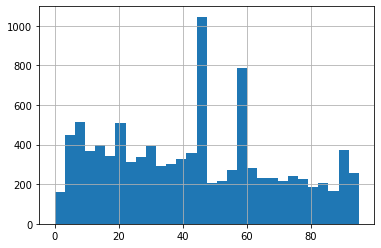

In [41]:
data['days_exposition'].hist(bins=30, range=(0, 95))

среди значений ниже среднего есть выбросы около 45 и 60 дней

In [42]:
data.query('40 < days_exposition < 65').pivot_table(index='days_exposition', values=['last_price'], aggfunc=['count', 'mean'])

,count,mean
,last_price,last_price
days_exposition,,
41.0,76,4.211537e+06
42.0,113,4.869507e+06
43.0,107,4.586669e+06
44.0,138,4.297748e+06
45.0,879,3.318168e+06
46.0,90,6.162105e+06
47.0,77,5.326025e+06
48.0,77,4.580375e+06


##### total_area, last_price, rooms

На гистограммах были обнаружены сильно выбивающиеся значения по площади, цене и количеству комнат.

In [43]:
data.sort_values('last_price', ascending=False).head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
12971,19,763000000.0,400.0,2017-09-30T00:00:00,7,2.65,10.0,250.00,10,False,False,False,76.00,2.0,Санкт-Петербург,25108.0,3956.0,1.0,530.0,3.0,756.0,33.0
19540,8,420000000.0,900.0,2017-12-06T00:00:00,12,2.80,25.0,409.70,25,False,False,False,112.00,0.0,Санкт-Петербург,30706.0,7877.0,0.0,NaN,2.0,318.0,106.0
14706,15,401300000.0,401.0,2016-02-20T00:00:00,5,2.65,9.0,204.00,9,False,False,False,24.00,3.0,Санкт-Петербург,21912.0,2389.0,1.0,545.0,1.0,478.0,393.0
1436,19,330000000.0,190.0,2018-04-04T00:00:00,3,3.50,7.0,95.00,5,False,False,False,40.00,0.0,Санкт-Петербург,23011.0,1197.0,3.0,519.0,3.0,285.0,233.0
15651,20,300000000.0,618.0,2017-12-18T00:00:00,7,3.40,7.0,258.00,5,False,False,False,70.00,0.0,Санкт-Петербург,32440.0,5297.0,0.0,NaN,2.0,198.0,111.0
22831,18,289238400.0,187.5,2019-03-19T00:00:00,2,3.37,6.0,63.70,6,False,False,False,30.20,0.0,Санкт-Петербург,22494.0,1073.0,3.0,386.0,3.0,188.0,NaN
16461,17,245000000.0,285.7,2017-04-10T00:00:00,6,3.35,7.0,182.80,4,False,False,False,29.80,0.0,Санкт-Петербург,33143.0,6235.0,3.0,400.0,3.0,140.0,249.0
13749,7,240000000.0,410.0,2017-04-01T00:00:00,6,3.40,7.0,218.00,7,False,False,False,40.00,0.0,Санкт-Петербург,32440.0,5297.0,0.0,NaN,2.0,198.0,199.0
5893,3,230000000.0,500.0,2017-05-31T00:00:00,6,2.65,7.0,280.00,7,False,False,False,40.00,0.0,Санкт-Петербург,32440.0,5297.0,0.0,NaN,2.0,198.0,50.0
8900,13,190870000.0,268.0,2016-03-25T00:00:00,3,2.65,8.0,132.00,7,False,False,False,40.00,0.0,Санкт-Петербург,32440.0,5297.0,0.0,NaN,2.0,198.0,901.0


Объекты с самой высокой ценой расположены в радиусе примерно 5 км. от центра и имеют очень большую площадь до 900 кв. м. и количеством комнат больше 5. Все эти характеристики выходят за пределы большинства средних значений и будут сильно искажать данные при исследовании.

In [44]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
total_images,23565.0,9.878421e+00,5.681156e+00,0.0,6.0,9.00,14.0,50.0
last_price,23565.0,6.540058e+06,1.091093e+07,12190.0,3400000.0,4646000.00,6790000.0,763000000.0
total_area,23565.0,6.032282e+01,3.565706e+01,12.0,40.0,52.00,69.7,900.0
rooms,23565.0,2.070656e+00,1.078591e+00,0.0,1.0,2.00,3.0,19.0
ceiling_height,23565.0,2.698638e+00,2.484878e-01,2.0,2.6,2.65,2.7,14.0
floors_total,23565.0,1.067588e+01,6.594823e+00,1.0,5.0,9.00,16.0,60.0
living_area,23565.0,3.453624e+01,2.232470e+01,2.0,19.0,30.00,42.0,409.7
floor,23565.0,5.878124e+00,4.871485e+00,1.0,2.0,4.00,8.0,33.0
kitchen_area,23565.0,1.057958e+01,6.106568e+00,1.3,7.0,9.10,12.0,112.0
balcony,23565.0,5.936771e-01,9.606601e-01,0.0,0.0,0.00,1.0,5.0


Очень большое значение стандартного отклонения у цены и площади

In [45]:
data.sort_values('last_price', ascending=True).head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
8793,7,12190.0,109.0,2019-03-20T00:00:00,2,2.75,25.0,32.00,25,False,False,False,40.50,0.0,Санкт-Петербург,36421.0,9176.0,1.0,805.0,0.0,NaN,8.0
17456,7,430000.0,30.4,2019-04-22T00:00:00,1,2.65,2.0,16.00,1,False,False,False,6.00,0.0,Сланцы,NaN,NaN,0.0,NaN,0.0,NaN,NaN
14911,5,430000.0,54.0,2018-06-26T00:00:00,2,2.65,3.0,30.24,3,False,False,False,10.26,0.0,поселок станции Свирь,NaN,NaN,0.0,NaN,0.0,NaN,44.0
16274,18,440000.0,40.0,2018-07-10T00:00:00,1,2.65,5.0,22.40,1,False,False,False,7.60,0.0,деревня Старополье,NaN,NaN,0.0,NaN,0.0,NaN,45.0
9581,7,450000.0,43.4,2018-08-31T00:00:00,2,2.65,5.0,30.30,3,False,False,False,5.50,0.0,деревня Старополье,NaN,NaN,0.0,NaN,0.0,NaN,96.0


Минимальная цена 12190 выглядит странно при площади 109 кв. м. Возможно цена указана в тысячах рублей - переведем в рубли

In [46]:
data.loc[8793, 'last_price'] = 12190000.0

Отбросим объекты с слишком высокими ценами

In [47]:
data_cor = []

for value in data['locality_name'].unique():
    data_cor_tmp = data.query('locality_name == @value')
    p25 = np.quantile(data_cor_tmp.last_price, 0.25)
    p75 = np.quantile(data_cor_tmp.last_price, 0.75)
    data_cor.append(data_cor_tmp[data_cor_tmp['last_price'] <= p75 + 1.5*(p75-p25)])

pd.concat(data_cor).reset_index()

,index,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.000,8,False,False,False,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.65,5.0,34.300,4,False,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
2,4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.000,13,False,False,False,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
3,7,5,7915000.0,71.6,2019-04-18T00:00:00,2,2.65,24.0,40.096,22,False,False,False,18.9,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
4,9,18,5400000.0,61.0,2017-02-26T00:00:00,3,2.50,9.0,43.600,7,False,False,False,6.5,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21937,22938,14,4000000.0,98.0,2018-03-15T00:00:00,4,2.65,2.0,73.000,2,True,False,False,9.0,1.0,деревня Нижняя,NaN,NaN,0.0,NaN,0.0,NaN,27.0
21938,23048,7,2449000.0,53.6,2018-07-10T00:00:00,2,2.65,5.0,28.400,2,False,False,False,8.8,0.0,коттеджный поселок Лесное,NaN,NaN,0.0,NaN,0.0,NaN,161.0
21939,23354,18,900000.0,42.6,2018-02-26T00:00:00,2,2.65,2.0,28.000,1,False,False,False,9.0,0.0,деревня Тихковицы,NaN,NaN,0.0,NaN,0.0,NaN,219.0
21940,23411,0,1100000.0,36.1,2017-06-30T00:00:00,2,2.70,2.0,24.000,1,False,False,False,5.5,0.0,деревня Борисова Грива,NaN,NaN,0.0,NaN,0.0,NaN,386.0


In [48]:
new_data = pd.concat(data_cor).reset_index()
new_data.shape[0] / data.shape[0]

0.9311266709102483

Выбросы составили 7 % - приемлемо, продолжим исследование с обновленными данными

#### Тип данных

Рассмотрение типов данных в каждом столбце, изменение, преобразование при необходимсти.

In [49]:
new_data.reset_index(drop=True, inplace=True)  #  сбросим индексы после удалений строк
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21942 entries, 0 to 21941
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 21942 non-null  int64  
 1   total_images          21942 non-null  int64  
 2   last_price            21942 non-null  float64
 3   total_area            21942 non-null  float64
 4   first_day_exposition  21942 non-null  object 
 5   rooms                 21942 non-null  int64  
 6   ceiling_height        21942 non-null  float64
 7   floors_total          21942 non-null  float64
 8   living_area           21942 non-null  float64
 9   floor                 21942 non-null  int64  
 10  is_apartment          21942 non-null  bool   
 11  studio                21942 non-null  bool   
 12  open_plan             21942 non-null  bool   
 13  kitchen_area          21942 non-null  float64
 14  balcony               21942 non-null  float64
 15  locality_name      

##### first_day_exposition

Поменяем тип данных на дату для совершения математических операций со значениями.

In [50]:
new_data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d %H:%M:%S')
new_data['first_day_exposition']

0       2019-03-07
1       2018-12-04
2       2015-08-20
3       2015-07-24
4       2018-06-19
           ...    
21937   2019-03-19
21938   2018-11-28
21939   2018-07-09
21940   2019-02-21
21941   2017-10-27
Name: first_day_exposition, Length: 21942, dtype: datetime64[ns]

##### floors_total, balcony

 Заменим на int64. Количество балконов не может быть дробным, хотя на подсчеты не влияет.

In [51]:
new_data = new_data.astype({ 'balcony': 'int64', 'floors_total': 'int64'})

new_data['balcony']

0        0
1        0
2        0
3        2
4        2
        ..
21937    1
21938    0
21939    0
21940    0
21941    0
Name: balcony, Length: 21942, dtype: int64

In [52]:
new_data['floors_total']

0        16
1         5
2        14
3        24
4         9
         ..
21937     2
21938     5
21939     2
21940     2
21941     5
Name: floors_total, Length: 21942, dtype: int64

### Посчитайте и добавьте в таблицу новые столбцы

In [53]:
# столбец с ценой за квадратный метр, значения округлим до 2 знаков 
new_data['price_per_m2'] = round(new_data['last_price'] / new_data['total_area'], 2)
new_data['price_per_m2']

0        120370.37
1         92785.71
2        100000.00
3        110544.69
4         88524.59
           ...    
21937     40816.33
21938     45690.30
21939     21126.76
21940     30470.91
21941     33439.49
Name: price_per_m2, Length: 21942, dtype: float64

In [54]:
# день недели публикации объявления от 0 до 6
new_data['weekday'] = new_data['first_day_exposition'].dt.weekday
new_data['weekday']

0        3.0
1        1.0
2        3.0
3        4.0
4        1.0
        ... 
21937    1.0
21938    2.0
21939    0.0
21940    3.0
21941    4.0
Name: weekday, Length: 21942, dtype: float64

In [55]:
# месяц публикации объявления
new_data['month'] = new_data['first_day_exposition'].dt.month
new_data['month']

0         3.0
1        12.0
2         8.0
3         7.0
4         6.0
         ... 
21937     3.0
21938    11.0
21939     7.0
21940     2.0
21941    10.0
Name: month, Length: 21942, dtype: float64

In [56]:
# год публикации объявления
new_data['year'] = new_data['first_day_exposition'].dt.year
new_data['year']

0        2019.0
1        2018.0
2        2015.0
3        2015.0
4        2018.0
          ...  
21937    2019.0
21938    2018.0
21939    2018.0
21940    2019.0
21941    2017.0
Name: year, Length: 21942, dtype: float64

In [57]:
# тип этажа квартиры (первый, последний, другой)
def floor_type(row):
    if row['floor'] == 1:
        return 'первый'
    if row['floor'] == row['floors_total']:
        return 'последний'
    return 'другой'

new_data['floor_type'] = new_data.apply(floor_type, axis = 1)

In [58]:
# расстояние до центра города в километрах
new_data['city_center_nearest_km'] = round(new_data['cityCenters_nearest'] / 1000)
new_data['city_center_nearest_km']

0        16.0
1        14.0
2         8.0
3        12.0
4        15.0
         ... 
21937     NaN
21938     NaN
21939     NaN
21940     NaN
21941     NaN
Name: city_center_nearest_km, Length: 21942, dtype: float64

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Все необходимые колонки добавлены. Идём дальше)
</div>

### Проведите исследовательский анализ данных

#### Изучение и описание параметров

##### общая площадь
 

Text(0.5, 0, 'кв.м.')

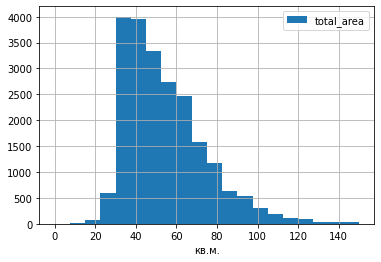

In [59]:
new_data['total_area'].hist(bins=20, range=(0, 150), legend='True').set_xlabel('кв.м.')



Чаще продают квартиры площадью около 40 кв.м.

##### жилая площадь

Text(0.5, 0, 'кв.м.')

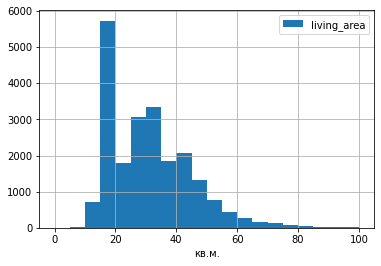

In [60]:
new_data['living_area'].hist(bins=20, range=(0, 100), legend='True').set_xlabel('кв.м.')

Большинство квартир с жилой площадью окоол 20 кв. м. и 30 кв.м. (вероятно студии и "однушки").

##### площадь кухни

Text(0.5, 0, 'кв.м.')

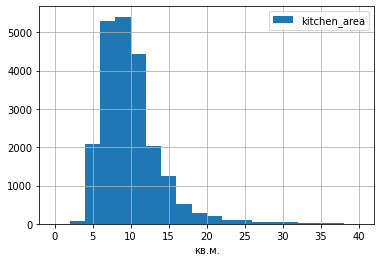

In [61]:
new_data['kitchen_area'].hist(bins=20, range=(0, 40), legend='True').set_xlabel('кв.м.')

Большинство значений площади кухни в районе 10 кв.м.

##### цена объекта

Для удобства переведем значения цен в млн. руб.

In [62]:
new_data['last_price'] = round(new_data['last_price'] / 1000000, 6)

In [63]:
new_data['last_price']

0        13.000
1         5.196
2        10.000
3         7.915
4         5.400
          ...  
21937     4.000
21938     2.449
21939     0.900
21940     1.100
21941     2.100
Name: last_price, Length: 21942, dtype: float64

Text(0.5, 0, 'млн. руб.')

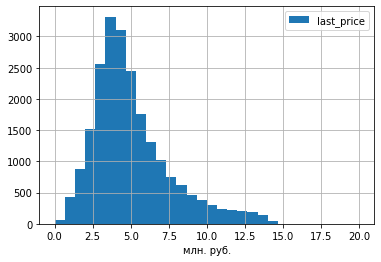

In [64]:
new_data['last_price'].hist(bins=30, range=(0, 20), legend='True').set_xlabel('млн. руб.')

In [65]:
new_data['last_price'].sort_values()

21869     0.43000
19606     0.43000
21747     0.44000
21746     0.45000
21713     0.45000
           ...   
7810     14.00000
2740     14.05000
10389    14.07362
21830    20.29520
21519    28.00000
Name: last_price, Length: 21942, dtype: float64

После удаления выбросов график приобрел вид с нормальным распределением. Большинство объявлений с ценой около 4.5 млн. руб., что соответствует однокомнатным квартирам

##### количество комнат

Text(0.5, 0, 'комнаты')

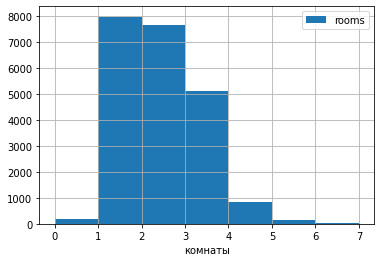

In [66]:
new_data['rooms'].hist(bins=7, legend='True').set_xlabel('комнаты')

С комнатами тоже все предсказуемо - самые популярные объекты с количеством комнат 1 и 2.

##### высота потолков

Text(0.5, 0, 'высота, м')

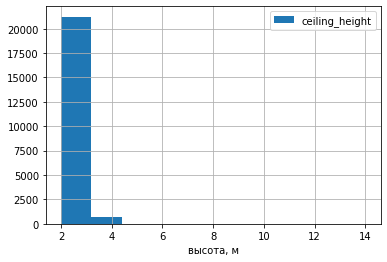

In [67]:
new_data['ceiling_height'].hist(bins=10, legend='True').set_xlabel('высота, м')

Самая частая высота потолков около 2,5 метров

##### этаж квартиры

Text(0.5, 0, 'этажи')

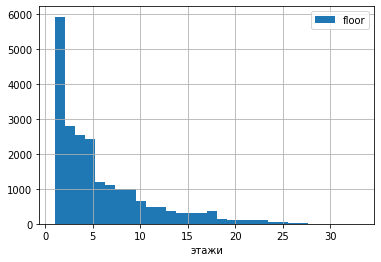

In [68]:
new_data['floor'].hist(bins=30, legend='True').set_xlabel('этажи')

Чаще продаются квартиры до 5 этажа

##### тип этажа квартиры («первый», «последний», «другой»)

<AxesSubplot:>

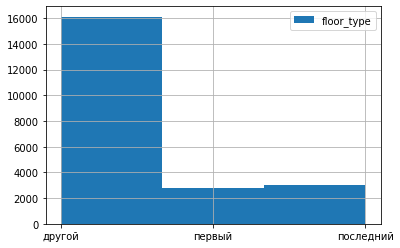

In [69]:
new_data['floor_type'].hist(bins=3, legend='True')

Большинство объявлений с квартирами не на первом и не на последним этажах. 

Количество квартир на первом и последнем этажах примерно одинаковое.

##### общее количество этажей в доме

<AxesSubplot:>

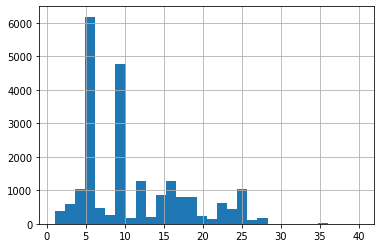

In [70]:
new_data['floors_total'].hist(bins=30, range=(1, 40))

Пяти- и девятиэтажки преобладают над остальными.

#####  расстояние до центра города в метрах

Text(0.5, 0, 'расстояние, м')

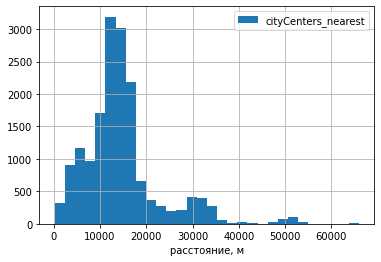

In [71]:
new_data['cityCenters_nearest'].hist(bins=30, legend='True').set_xlabel('расстояние, м')

Большинство объектов находятся в пределах 20 км. от центра, что соответствует объявлениям для Санкт-Петербурга.

##### расстояние до ближайшего аэропорта

Text(0.5, 0, 'расстояние, м')

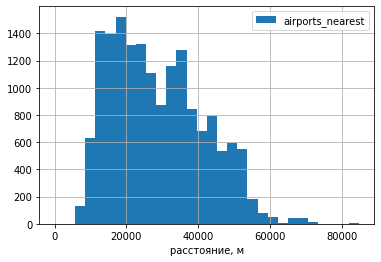

In [72]:
new_data['airports_nearest'].hist(bins=30, legend='True').set_xlabel('расстояние, м')

In [73]:
new_data.query('airports_nearest == 0')

,index,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_m2,weekday,month,year,floor_type,city_center_nearest_km
12760,21085,0,7.0,34.7,2015-01-22,1,2.7,9,19.8,3,False,False,False,6.0,2,Санкт-Петербург,0.0,22801.0,0.0,NaN,0.0,NaN,60.0,201729.11,3.0,1.0,2015.0,другой,23.0


Есть одно объявление о продаже квартиры в аэропорте

##### расстояние до ближайшего парка

Text(0.5, 0, 'расстояние, м')

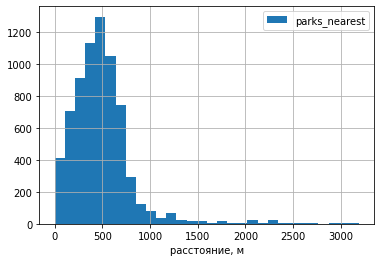

In [74]:
new_data['parks_nearest'].hist(bins=30, legend='True').set_xlabel('расстояние, м')

##### день и месяц публикации объявления

Text(0.5, 0, 'дни недели')

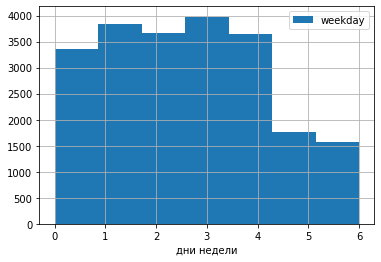

In [75]:
new_data['weekday'].hist(bins=7, legend='True').set_xlabel('дни недели')

Реже чем в другие дни объявления публиковались в субботу и воскресенье.

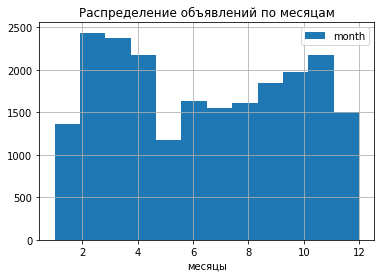

In [76]:
new_data['month'].hist(bins=12, legend='True').set_xlabel('месяцы')
plt.title('Распределение объявлений по месяцам')
plt.show()

По месяцам можно проследить сезонность: активно размещаются объявления с февраля, к лету идет спад и постепенно увеличиваются к декабрю.

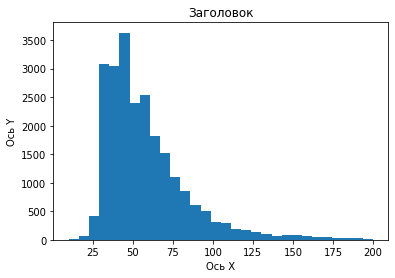

In [77]:
plt.hist(data['total_area'], bins=30, range=(10,200))
plt.title('Заголовок')
plt.xlabel('Ось Х')
plt.ylabel('Ось Y')
plt.show()

#### Как быстро продавались квартиры
"Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.

Постройте гистограмму.

Посчитайте среднее и медиану.

В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"

<AxesSubplot:>

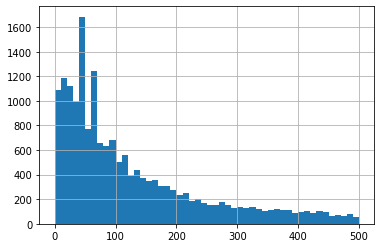

In [78]:
new_data['days_exposition'].hist(bins=50, range=(0, 500))

In [79]:
data['days_exposition'].describe()

count    20394.000000
mean       180.741395
std        219.732782
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

Обычно для продажи квартиры требуется около 3-х месяцев. Быстрыми можно назвать продажи до 45 дней, долгими - от 198.

Обнаружено 879 объявлений с количеством дней в экспозиции ровно 45, и 538 с количеством дней в экспозиции ровно 60. "Пики" соответствуют условиям Яндекс.Недвижимость для бесплатного срока размещения объявлений для квартир стоимостью до 4,5 млн — 45 дней и от 4,5 до 10 млн — 60 дней.

In [80]:
new_data.query('days_exposition == 60')


,index,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_m2,weekday,month,year,floor_type,city_center_nearest_km
56,105,12,4.900000,32.0,2016-03-28,1,2.65,25,15.000,5,False,False,False,9.00,0,Санкт-Петербург,52480.0,15598.0,0.0,NaN,1.0,464.0,60.0,153125.00,0.0,3.0,2016.0,другой,16.0
64,118,8,4.500000,31.0,2017-11-07,1,2.50,9,17.000,4,False,False,False,5.00,0,Санкт-Петербург,35445.0,9089.0,0.0,NaN,2.0,439.0,60.0,145161.29,1.0,11.0,2017.0,другой,9.0
76,143,9,2.990000,30.0,2016-05-14,1,2.50,9,20.000,9,False,False,False,5.60,0,Санкт-Петербург,30067.0,6262.0,0.0,NaN,1.0,332.0,60.0,99666.67,5.0,5.0,2016.0,последний,6.0
190,352,3,5.496074,48.6,2016-06-01,1,2.65,11,13.000,3,False,False,False,15.00,2,Санкт-Петербург,23609.0,5299.0,0.0,NaN,1.0,433.0,60.0,113087.94,2.0,6.0,2016.0,другой,5.0
228,416,7,5.200000,52.0,2017-11-25,2,2.65,12,30.500,12,False,False,False,9.00,1,Санкт-Петербург,34636.0,12010.0,0.0,NaN,0.0,NaN,60.0,100000.00,5.0,11.0,2017.0,последний,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21459,2915,8,1.550000,56.6,2017-12-01,3,2.65,4,40.100,2,False,False,False,6.00,1,Лодейное Поле,NaN,NaN,0.0,NaN,0.0,NaN,60.0,27385.16,4.0,12.0,2017.0,другой,NaN
21490,7757,0,5.050000,52.0,2018-03-02,2,2.80,7,29.120,3,False,False,False,9.88,0,деревня Кузьмолово,NaN,NaN,0.0,NaN,0.0,NaN,60.0,97115.38,4.0,3.0,2018.0,другой,NaN
21522,15483,10,5.100000,55.0,2018-11-27,3,2.50,5,30.800,4,False,False,False,10.45,0,поселок Репино,64127.0,45226.0,0.0,NaN,0.0,NaN,60.0,92727.27,1.0,11.0,2018.0,другой,45.0
21735,21934,3,7.305000,43.3,2018-03-07,1,2.65,10,24.248,10,False,False,False,9.90,0,поселок Лисий Нос,54068.0,26368.0,0.0,NaN,0.0,NaN,60.0,168706.70,2.0,3.0,2018.0,последний,26.0


#### Какие факторы больше всего влияют на общую (полную) стоимость объекта? 
Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."

<AxesSubplot:>

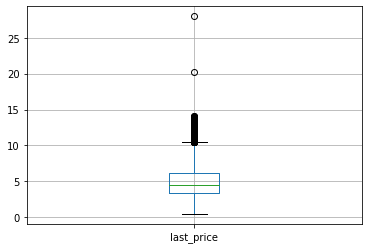

In [81]:
new_data.boxplot('last_price')

In [82]:
new_data.describe().T

,count,mean,std,min,25%,50%,75%,max
index,21942.0,11857.644745,6840.794240,0.00,5920.5000,11856.500,17787.7500,23698.00
total_images,21942.0,9.714520,5.560125,0.00,6.0000,9.000,14.0000,50.00
last_price,21942.0,5.055720,2.572533,0.43,3.3500,4.499,6.2000,28.00
total_area,21942.0,54.329207,20.712484,12.00,39.0000,50.000,64.7075,255.00
rooms,21942.0,1.955200,0.933331,0.00,1.0000,2.000,3.0000,7.00
ceiling_height,21942.0,2.680175,0.223555,2.00,2.6000,2.650,2.7000,14.00
floors_total,21942.0,10.795552,6.643983,1.00,5.0000,9.000,16.0000,60.00
living_area,21942.0,31.133913,14.330827,2.00,18.5000,29.400,39.7000,160.00
floor,21942.0,5.893993,4.906237,1.00,2.0000,4.000,8.0000,33.00
kitchen_area,21942.0,9.728903,4.108958,1.30,7.0000,9.000,11.1100,100.70


In [83]:
new_data.sort_values('last_price', ascending=False).head(30)

,index,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_m2,weekday,month,year,floor_type,city_center_nearest_km
21519,2454,12,28.00000,160.00,2018-10-28,3,3.00,2,92.0000,2,False,False,False,30.000,4,поселок Репино,61484.0,42583.0,0.0,NaN,0.0,NaN,NaN,175000.00,6.0,10.0,2018.0,последний,43.0
21830,11800,1,20.29520,192.30,2018-10-27,6,2.95,2,147.2000,1,False,False,False,17.800,0,деревня Бор,NaN,NaN,0.0,NaN,0.0,NaN,162.0,105539.26,5.0,10.0,2018.0,первый,NaN
10389,17173,4,14.07362,75.44,2017-10-03,2,3.04,5,42.2464,2,False,False,False,21.600,0,Санкт-Петербург,36406.0,8972.0,1.0,2489.0,3.0,409.0,90.0,186553.82,1.0,10.0,2017.0,другой,9.0
2740,4575,1,14.05000,108.00,2018-12-06,3,3.15,4,77.0000,4,False,False,False,10.000,0,Санкт-Петербург,22881.0,2423.0,0.0,NaN,1.0,667.0,22.0,130092.59,3.0,12.0,2018.0,последний,2.0
9114,15078,20,14.00000,85.20,2018-03-20,3,3.63,5,49.7000,3,False,False,False,11.700,0,Санкт-Петербург,23647.0,1471.0,3.0,264.0,3.0,35.0,305.0,164319.25,1.0,3.0,2018.0,другой,1.0
1263,2169,1,14.00000,117.10,2018-11-20,4,3.52,5,82.4000,3,False,False,False,10.300,0,Санкт-Петербург,23401.0,4183.0,0.0,NaN,0.0,NaN,NaN,119555.94,1.0,11.0,2018.0,другой,4.0
4205,6980,6,14.00000,173.00,2019-03-23,5,3.40,6,123.0000,4,False,False,False,23.000,0,Санкт-Петербург,27026.0,5142.0,1.0,78.0,0.0,NaN,1226.0,80924.86,5.0,3.0,2019.0,другой,5.0
12976,21426,15,14.00000,137.00,2018-03-16,5,3.00,7,90.0000,4,False,False,False,23.000,1,Санкт-Петербург,23546.0,3088.0,1.0,347.0,0.0,NaN,1046.0,102189.78,4.0,3.0,2018.0,другой,3.0
9881,16386,10,14.00000,103.40,2017-09-25,3,2.86,17,59.0000,10,False,False,False,16.500,5,Санкт-Петербург,13292.0,14847.0,0.0,NaN,0.0,NaN,121.0,135396.52,0.0,9.0,2017.0,другой,15.0
6280,10393,1,14.00000,112.00,2019-04-26,2,2.65,8,62.7200,6,False,False,False,22.500,0,Санкт-Петербург,24796.0,3371.0,3.0,528.0,2.0,383.0,90.0,125000.00,4.0,4.0,2019.0,другой,3.0


Объекты с ценой 20 и 28 млн. руб. для построения зависимости объекты будут выбросами.

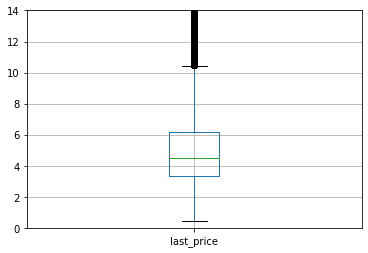

In [84]:
new_data.boxplot('last_price')
plt.ylim([0, 14])
plt.show()

In [85]:
new_data = new_data.query('last_price < 20')

##### Зависимость цены от общей площади

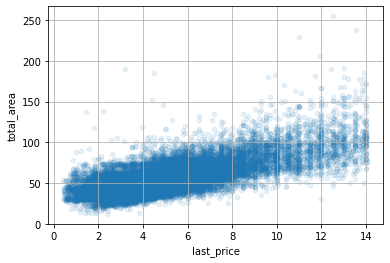

In [86]:
new_data.plot(x='last_price', y='total_area', kind='scatter', grid=True, alpha=0.1)
plt.show()

In [87]:
new_data['total_area'].corr(new_data['last_price'])

0.7401240504680676

Чем выше площадь, тем выше цена. При значительном увеличении показателей связь уменьшается.

##### Зависимость цены от жилой площади

<AxesSubplot:xlabel='last_price', ylabel='living_area'>

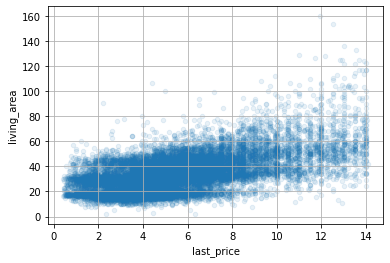

In [88]:
new_data.plot(x='last_price', y='living_area', kind='scatter', grid=True, alpha=0.1)

In [89]:
new_data['last_price'].corr(new_data['living_area'])

0.6304619092416052

С жилой площадью ситуация как и с  общей, но менее выраженно.

##### Зависимость цены от площади кухни


<AxesSubplot:xlabel='last_price', ylabel='kitchen_area'>

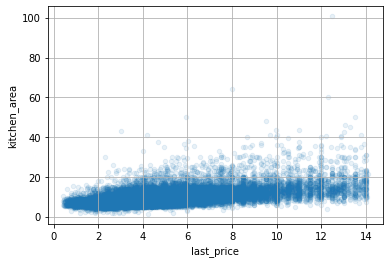

In [90]:
new_data.plot(x='last_price', y='kitchen_area', kind='scatter', grid=True, alpha=0.1)

In [91]:
new_data['last_price'].corr(new_data['kitchen_area'])

0.5404892992884818

Зависимость цены от площади кухни меньше других категорий площадей. С увеличением значений зависимость также уменьшается.

##### Зависимость цены от количество комнат


<AxesSubplot:>

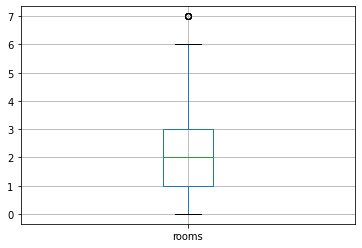

In [92]:
new_data.boxplot('rooms')

<AxesSubplot:xlabel='rooms'>

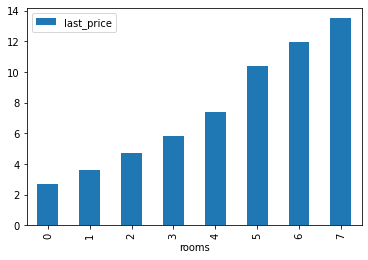

In [93]:
new_data.pivot_table(index='rooms', values='last_price', aggfunc='median').plot(kind='bar', y='last_price')

Чем больше комнат, тем дороже.

##### Зависимость цены от типа этажа, на котором расположена квартира (первый, последний, другой)


<AxesSubplot:xlabel='floor_type'>

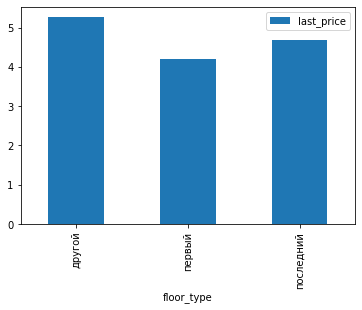

In [94]:
new_data.pivot_table(index='floor_type', values='last_price', aggfunc='mean').plot(kind='bar', y='last_price')

Самые высоки цены на квартиры не не первом и не на последнем этажах. Стоимость первого этажа ниже других.

##### Зависимость цены от даты размещения (день недели, месяц, год)

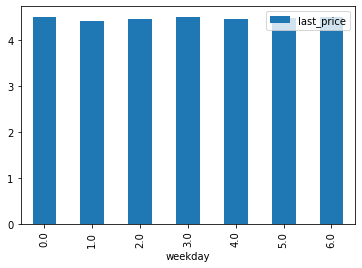

In [95]:
new_data.pivot_table(index='weekday', values='last_price', aggfunc='median').plot.bar()
plt.show()

Медианное значение цены не зависит от дня недели размещения.

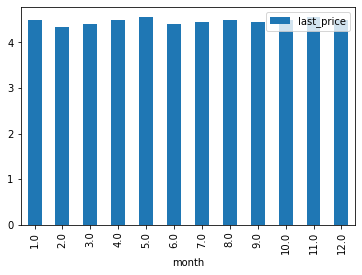

In [96]:
new_data.pivot_table(index='month', values='last_price', aggfunc='median').plot.bar()
plt.show()

Практически не зависит цена объекта от месяца размещения.

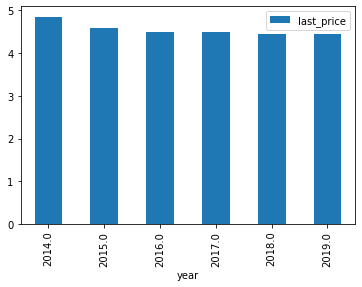

In [97]:
new_data.pivot_table(index='year', values='last_price', aggfunc='median').plot.bar()
plt.show()

В целом цены на одном уровне, небольшое снижение после 2014 года.

#### Cредняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений
Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце locality_name."

In [98]:
new_data.pivot_table(index='locality_name', values='price_per_m2', aggfunc=['count', 'median'])\
.sort_values(by=[('count', 'price_per_m2'), ('median', 'price_per_m2')], ascending=False).head(10)

,count,median
,price_per_m2,price_per_m2
locality_name,,
Санкт-Петербург,14313,102604.17
поселок Мурино,542,85668.82
Кудрово,455,94972.07
поселок Шушары,429,76666.67
Всеволожск,387,65648.85
Пушкин,341,98471.99
Колпино,321,74324.32
поселок Парголово,319,91346.15


In [99]:
new_data.pivot_table(index='locality_name', values='price_per_m2', aggfunc=['count', 'median'])\
.sort_values(by=[('count', 'price_per_m2'), ('median', 'price_per_m2')], ascending=False).head(10).mean()

count   price_per_m2     1762.600
median  price_per_m2    81426.235
dtype: float64

Самая высокая стоимость метра и количество объявлений ожидаемо в Санкт-Петербурге, далее идут ближайшие города в области.

Самы низкие цены за метр в отдаленный районах Ленобласти.

Населённый пункт с максимальной ценой из топ10 - Санкт-Петербург - 102604.17 руб. за метр, с минимальной - Выборг - 57500.00 руб. за метр.
    
Средняя цена за метр в топ 10 - 81426.24 руб.

#### Cредняя цена каждого километра
выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."

<AxesSubplot:xlabel='city_center_nearest_km'>

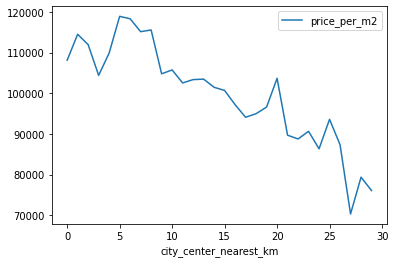

In [100]:
new_data.query('locality_name == "Санкт-Петербург"')\
    .pivot_table(index='city_center_nearest_km', values='price_per_m2', aggfunc='median').plot()

Ближе к центру стоимость метра выше. Есть небольшие выбросы, возможно дорогой район в отдалении от центра.

После 8 км заканчивается центр города, там как раз начинается резкий спад. Но 15 км в одном направлении от центра может быть уже пригород с низкой ценой, а 20 км в другом направлении ещё город и там цена выше.

### Общий вывод

В результате проведенного анализа можно сделать следующие выводы:
* Основной массой объявлений являются 1-2 комнатный квартиры, средней площадью 35-50 кв. метров;
* Соотношение площади кухни и жилой площади в среднем одинаково соотносятся с общей площадью;
* Большинство объектов с высотой потолка около 2.5 меторв;
* В данных преобладают квартиры в пяти, либо девятиэтажных домах, расположенные не на первом и не на последнем этажах;
* 3 месяца характерный срок нахождения объявления в экспозиции. 
 
Выявлены следующие зависимости:
* Чем больше площадь квартиры тем выше стоимость, при это общая площадь больше влияет на стоимость объекта, чем площадь кухни или жилая площадь;
* Чем больше площадь квартиры отличается от средней, тем зависимость цены становится меньше;
* Стоимость квартир на первом этаже ниже остальных, квартиры, располагающиеся на этажах кроме первого и последнего, стоят дороже;
* Средняя стоимость объявлений практически не зависит от дня месяца и года размещения, но есть связь с количеством объявлений: в выходные меньше, чем в будние дни. Количеств объявлений за год росло до 2018 года, потом снизилось до уровня 2016 года. К лету количество объявлений уменьшается, далее увеличивается к декабрю;
* В Ленобласти стоимость квадратного метра увеличивается ближе к Санкт-Петербургу;
* В Санкт-Петербурге стоимость за метр выше ближе к центру, но в зависимости от района стоимость метра может отличаться. 
